Titanic Survival Prediction
Machine Learning Project INT254
Submission by:-
K21ML
Name: Shalini Guha
Reg no: 12107495
Roll no: 15
Name: Samriddhi Gupta
Reg no: 12107731
Roll no: 16

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sea

In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [ ]:
from sklearn import preprocessing

In [ ]:
titanicdata = pd.read_csv("/content/train.csv")
titanicdata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanicdata.shape

(891, 12)

In [ ]:
titanicdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic_test = pd.read_csv("/content/test.csv")
titanic_test.head().T

styled_table = titanic_test.head().T.style.set_table_styles([
    {'selector': 'th', 'props': [('background-color', 'lightyellow'), ('color', 'black')]},
    {'selector': 'td', 'props': [('background-color', 'lightblue'), ('color', 'black')]}
])
styled_table

,0,1,2,3,4
PassengerId,892,893,894,895,896
Pclass,3,3,2,3,3
Name,"Kelly, Mr. James","Wilkes, Mrs. James (Ellen Needs)","Myles, Mr. Thomas Francis","Wirz, Mr. Albert","Hirvonen, Mrs. Alexander (Helga E Lindqvist)"
Sex,male,female,male,male,female
Age,34.500000,47.000000,62.000000,27.000000,22.000000
SibSp,0,1,0,0,1
Parch,0,0,0,0,1
Ticket,330911,363272,240276,315154,3101298
Fare,7.829200,7.000000,9.687500,8.662500,12.287500
Cabin,nan,nan,nan,nan,nan


In [ ]:
titanicdata.describe()
styled_table = titanicdata.head().style.set_table_styles([
    {'selector': 'th', 'props': [('background-color', 'lightblue'), ('color', 'black')]},
    {'selector': 'td', 'props': [('background-color', 'lightyellow'), ('color', 'black')]}
])
styled_table

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.250000,nan,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.000000,1,0,PC 17599,71.283300,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.925000,nan,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.100000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.050000,nan,S


In [ ]:
null_columns=titanicdata.columns[titanicdata.isnull().any()]
titanicdata.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
titanic_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

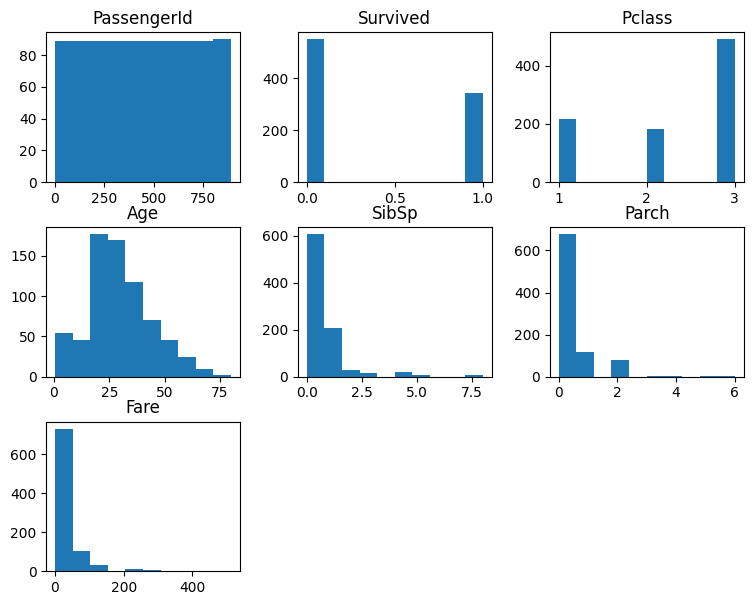

In [ ]:
titanicdata.hist(bins=10,figsize=(9,7),grid=False);

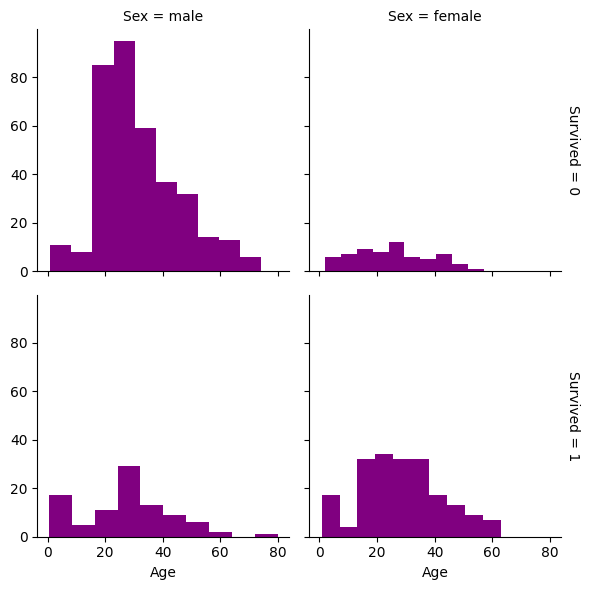

In [ ]:
g = sea.FacetGrid(titanicdata, col="Sex", row="Survived", margin_titles=True)
g.map(plt.hist, "Age",color="purple");

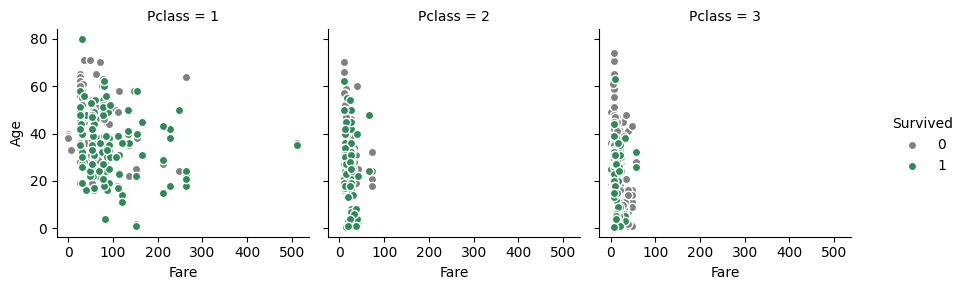

In [ ]:
g = sea.FacetGrid(titanicdata, hue="Survived", col="Pclass", margin_titles=True,
                  palette={1:"seagreen", 0:"gray"})
g=g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend();

Survival by Age, Gender and Fare

In [ ]:
gen_count = titanicdata['Sex'].value_counts()

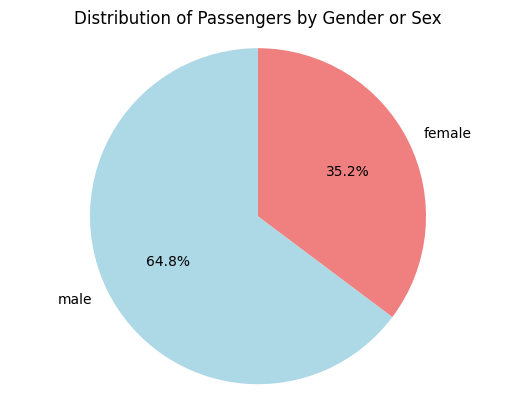

In [ ]:
plt.pie(gen_count, labels=gen_count.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Distribution of Passengers by Gender or Sex')
plt.axis('equal')
plt.show()

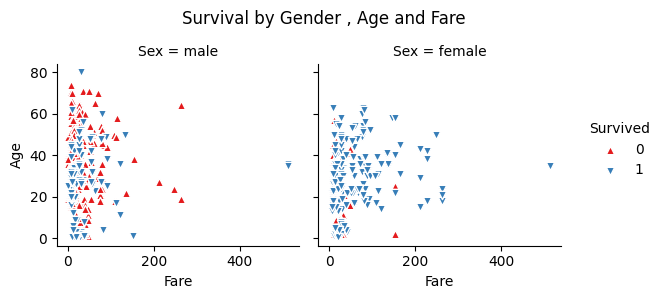

In [ ]:
g = sea.FacetGrid(titanicdata, hue="Survived", col="Sex", margin_titles=True,
                palette="Set1",hue_kws=dict(marker=["^", "v"]))
g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Survival by Gender , Age and Fare');

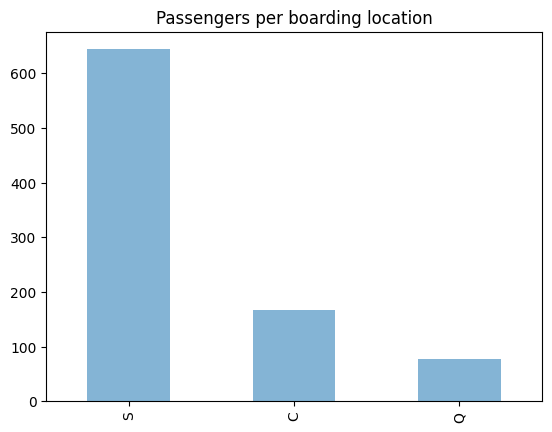

In [ ]:
titanicdata.Embarked.value_counts().plot(kind='bar', alpha=0.55)
plt.title("Passengers per boarding location");

PC Survival

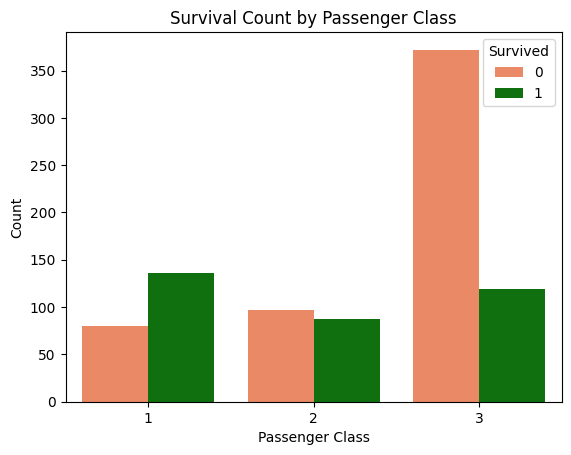

In [ ]:
sea.countplot(x='Pclass', hue='Survived', data=titanicdata, palette=['coral', 'green'])

plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.title('Survival Count by Passenger Class')
plt.show()

<ipython-input-24-61287a2512aa>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sea.catplot(x="Sex", y="Survived", col="Pclass",


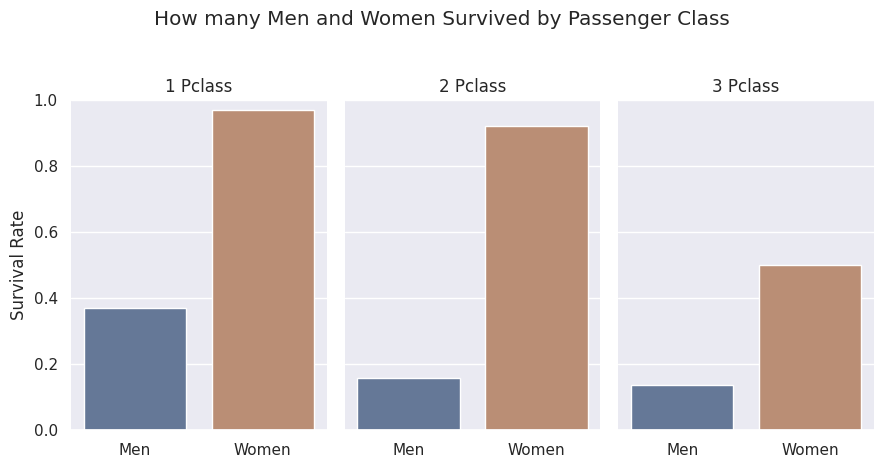

In [ ]:
sea.set(font_scale=1)
g = sea.catplot(x="Sex", y="Survived", col="Pclass",
                    data=titanicdata, saturation=.5,
                    kind="bar", ci=None, aspect=.6)
(g.set_axis_labels("", "Survival Rate")
    .set_xticklabels(["Men", "Women"])
    .set_titles("{col_name} {col_var}")
    .set(ylim=(0, 1))
    .despine(left=True))
plt.subplots_adjust(top=0.8)
g.fig.suptitle('How many Men and Women Survived by Passenger Class');

Survival by Age

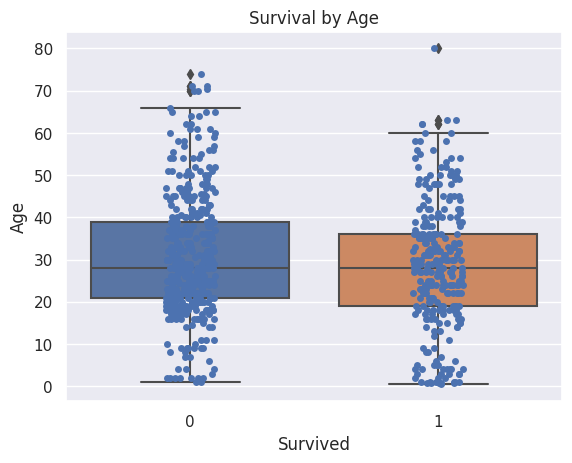

In [ ]:
ax = sea.boxplot(x="Survived", y="Age", data=titanicdata)
ax = sea.stripplot(x="Survived", y="Age", data=titanicdata, jitter=True, edgecolor="gray")
plt.title("Survival by Age", fontsize=12)
plt.show()

Distribution of age within classes

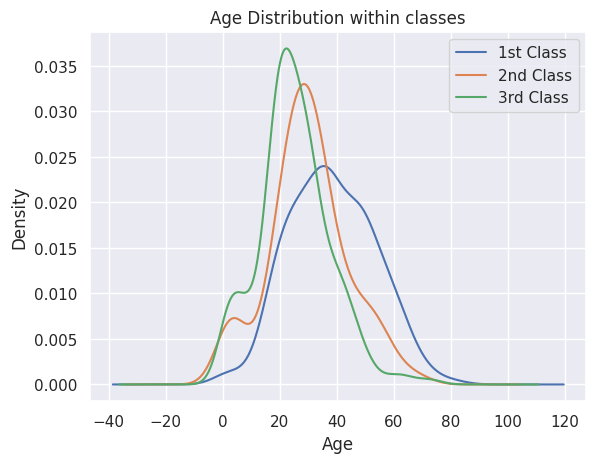

In [ ]:
titanicdata.Age[titanicdata.Pclass == 1].plot(kind='kde')
titanicdata.Age[titanicdata.Pclass == 2].plot(kind='kde')
titanicdata.Age[titanicdata.Pclass == 3].plot(kind='kde')
plt.xlabel("Age")
plt.title("Age Distribution within classes")
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') ;

Correlation between features

<ipython-input-27-ac603ea9e54c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = titanicdata.corr()


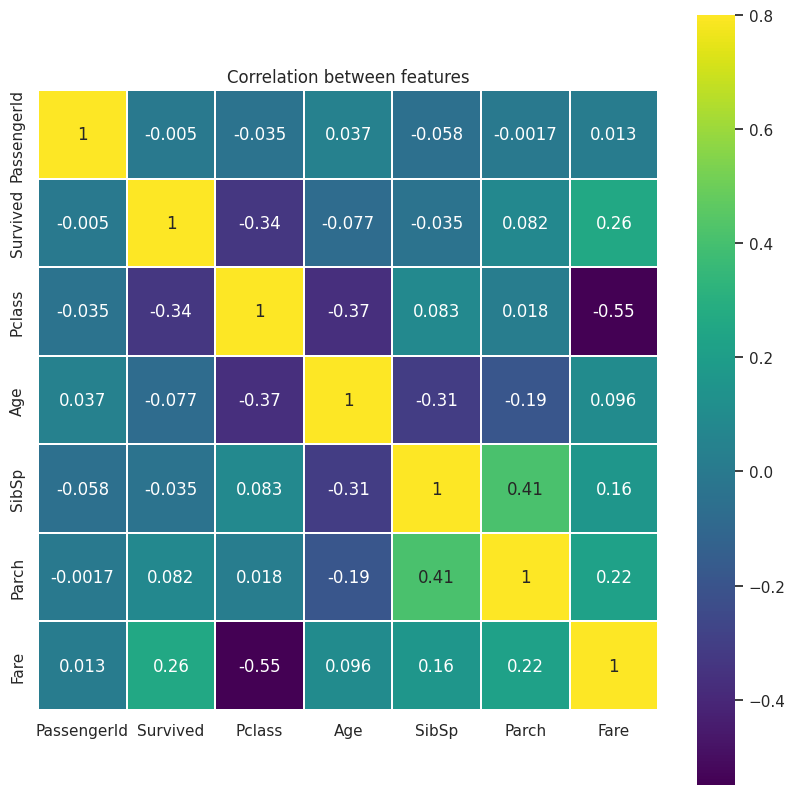

In [ ]:
corr = titanicdata.corr()
plt.figure(figsize=(10, 10))
sea.heatmap(corr, vmax=.8, linewidths=0.01, square=True, annot=True, cmap='viridis', linecolor="white")
plt.title('Correlation between features')
plt.show()

In [ ]:
titanicdata.corr()["Survived"]

<ipython-input-28-ba86593d14ba>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  titanicdata.corr()["Survived"]


PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

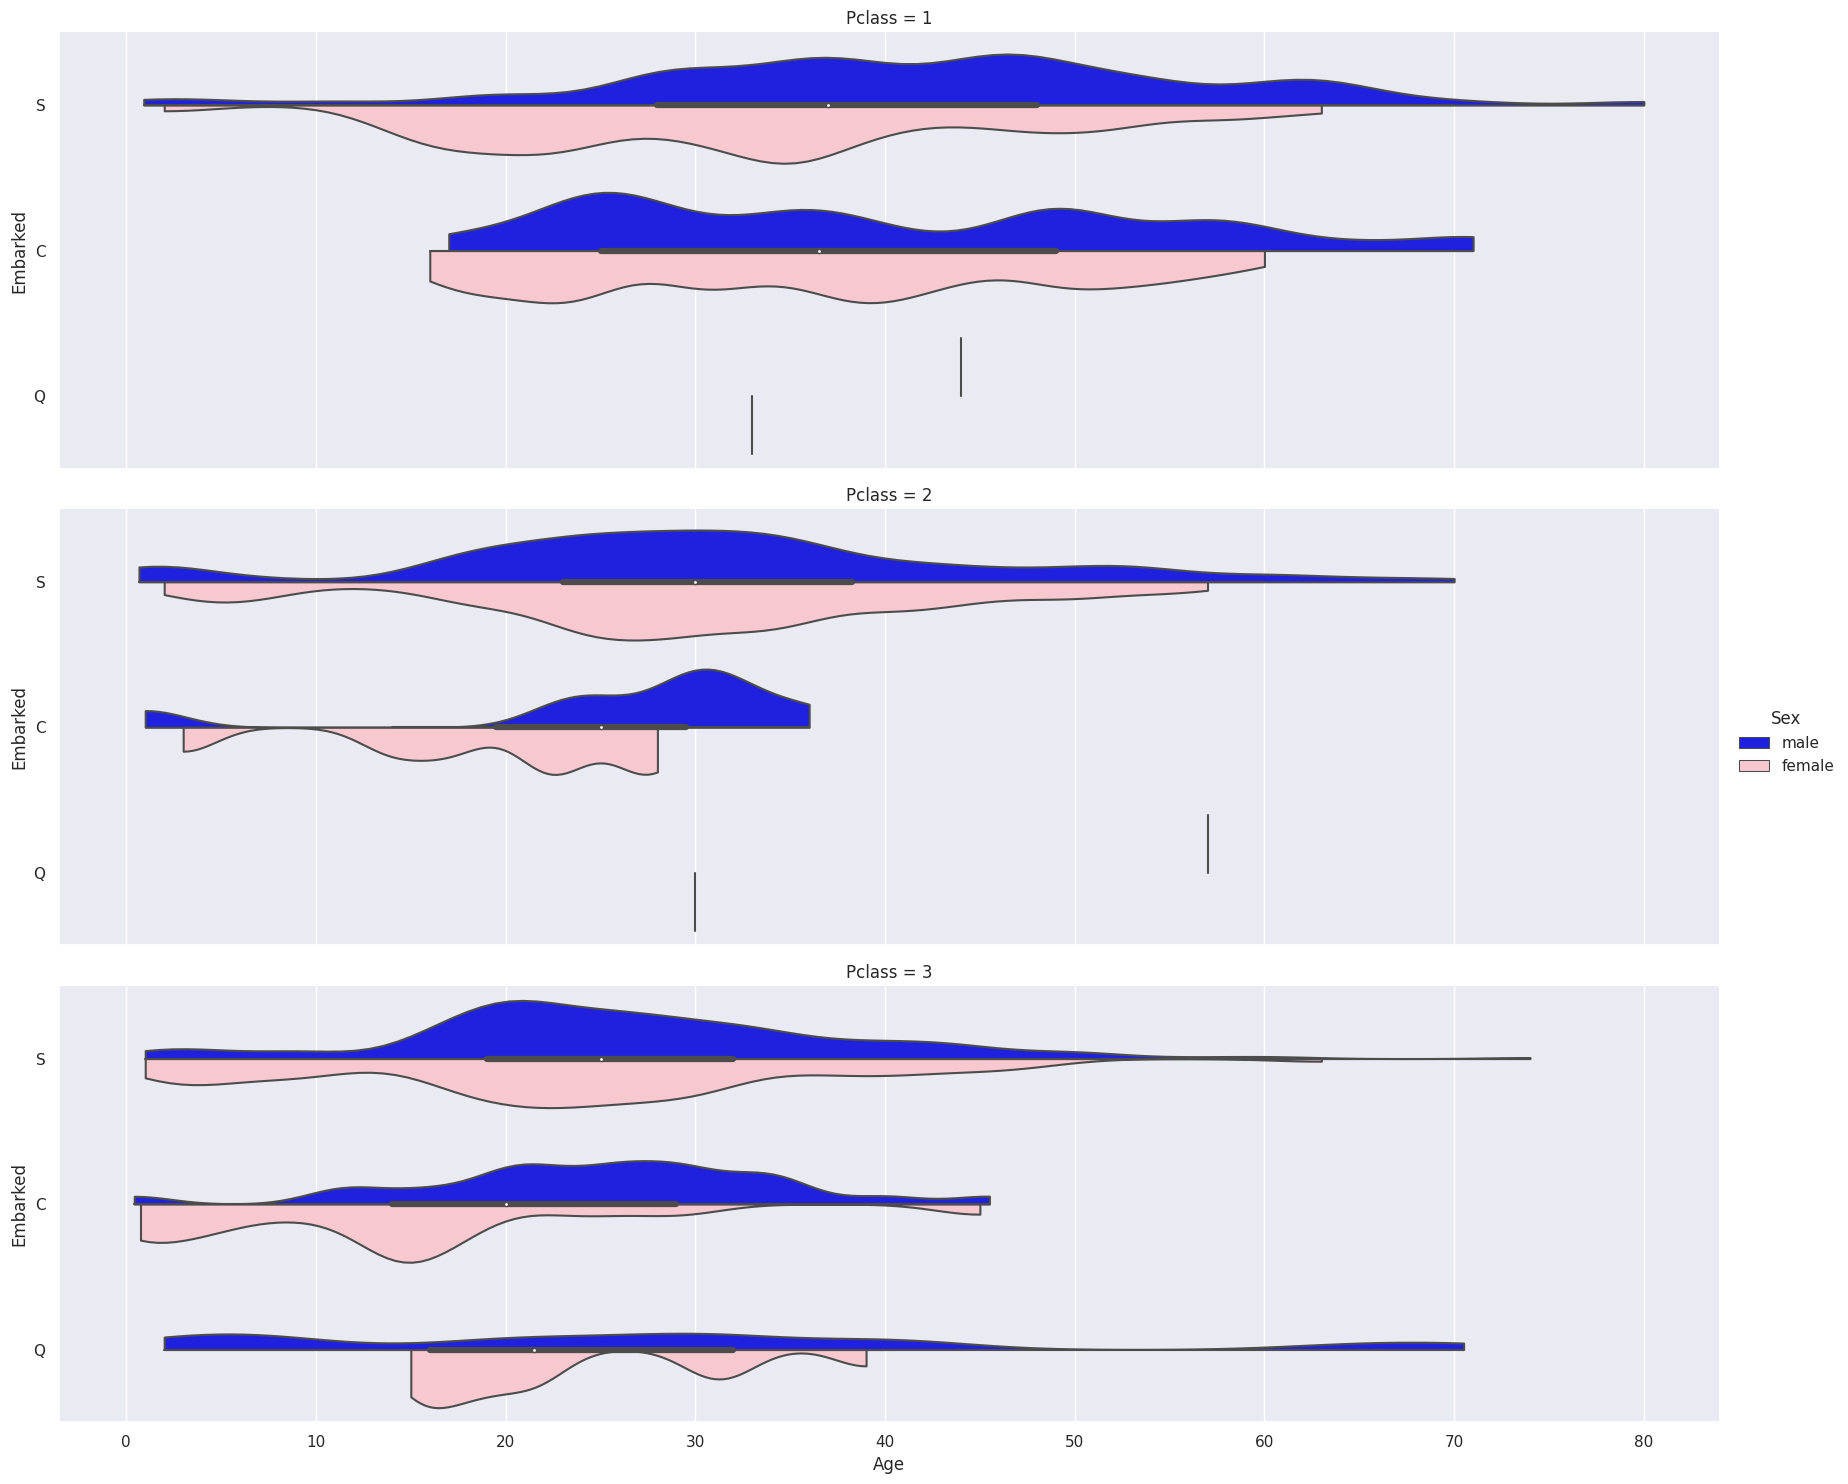

In [ ]:
g = sea.catplot(x="Age", y="Embarked",
                    hue="Sex", row="Pclass",
                    data=titanicdata[titanicdata.Embarked.notnull()],
                    orient="h", size=2, aspect=3.5,
                   palette={'male':"blue", 'female':"pink"},
                    kind="violin", split=True, cut=0, bw=.2);

In [ ]:
styled_table = titanicdata[titanicdata['Embarked'].isnull()].style.set_table_styles([
    {'selector': 'th', 'props': [('background-color', 'beige'), ('color', 'black')]},
    {'selector': 'td', 'props': [('background-color', 'pink'), ('color', 'black')]}
])
styled_table

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.000000,0,0,113572,80.000000,B28,nan
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.000000,0,0,113572,80.000000,B28,nan


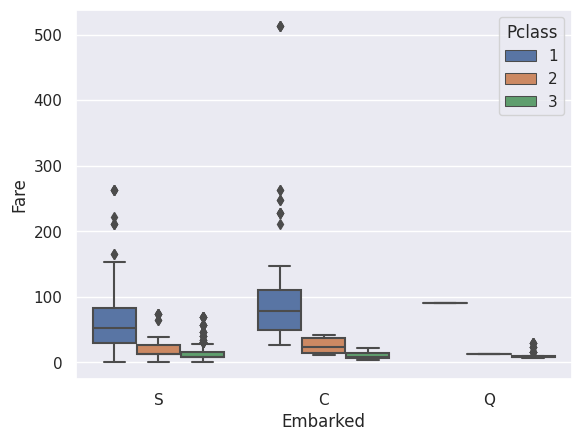

In [ ]:
sea.boxplot(x="Embarked", y="Fare", hue="Pclass", data=titanicdata);

In [ ]:
titanicdata["Embarked"] = titanicdata["Embarked"].fillna('C')

In [ ]:
styled_table = titanic_test.describe().style.set_table_styles([
    {'selector': 'th', 'props': [('background-color', 'lightblue'), ('color', 'black')]},
    {'selector': 'td', 'props': [('background-color', 'lightyellow'), ('color', 'black')]}
])
styled_table

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
styled_table = titanic_test[titanic_test['Fare'].isnull()].style.set_table_styles([
    {'selector': 'th', 'props': [('background-color', 'pink'), ('color', 'black')]},
    {'selector': 'td', 'props': [('background-color', 'beige'), ('color', 'black')]}
])
styled_table

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.500000,0,0,3701,nan,nan,S


In [ ]:
def fill_missing_fare(df):
    median_fare=df[(df['Pclass'] == 3) & (df['Embarked'] == 'S')]['Fare'].median()

    df["Fare"] = df["Fare"].fillna(median_fare)
    return df

titanic_test=fill_missing_fare(titanic_test)

Location of Passengers on Titanic

In [ ]:
titanicdata["Deck"]=titanicdata.Cabin.str[0]
titanic_test["Deck"]=titanic_test.Cabin.str[0]
titanicdata["Deck"].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

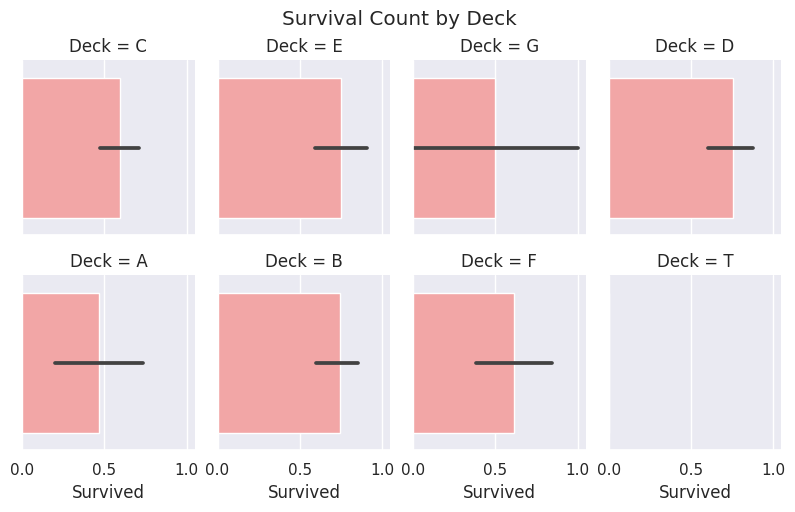

In [ ]:
titanicdata["Deck"]=titanicdata.Cabin.str[0]
titanic_test["Deck"]=titanic_test.Cabin.str[0]
titanicdata["Deck"].unique()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


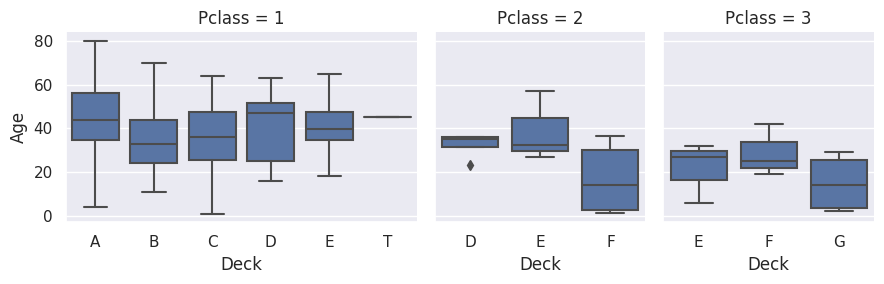

In [ ]:
titanicdata = titanicdata.assign(Deck=titanicdata.Deck.astype(object)).sort_values("Deck")
g = sea.FacetGrid(titanicdata, col="Pclass", sharex=False, gridspec_kws={"width_ratios": [5, 3, 3]})
g.map(sea.boxplot, "Deck", "Age")

In [ ]:
titanicdata.Deck.fillna('Z', inplace=True)
titanic_test.Deck.fillna('Z', inplace=True)
titanicdata["Deck"].unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'Z'], dtype=object)

Features and targets

In [ ]:
titanicdata["FamilySize"] = titanicdata["SibSp"] + titanicdata["Parch"]+1
titanic_test["FamilySize"] = titanic_test["SibSp"] + titanic_test["Parch"]+1
print(titanicdata["FamilySize"].value_counts())

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64


In [ ]:
titanicdata.loc[titanicdata["FamilySize"] == 1, "FsizeD"] = 'singleton'
titanicdata.loc[(titanicdata["FamilySize"] > 1)  &  (titanicdata["FamilySize"] < 5) , "FsizeD"] = 'small'
titanicdata.loc[titanicdata["FamilySize"] >4, "FsizeD"] = 'large'

titanic_test.loc[titanic_test["FamilySize"] == 1, "FsizeD"] = 'singleton'
titanic_test.loc[(titanic_test["FamilySize"] >1) & (titanic_test["FamilySize"] <5) , "FsizeD"] = 'small'
titanic_test.loc[titanic_test["FamilySize"] >4, "FsizeD"] = 'large'
print(titanicdata["FsizeD"].unique())
print(titanicdata["FsizeD"].value_counts())

['singleton' 'small' 'large']
singleton    537
small        292
large         62
Name: FsizeD, dtype: int64


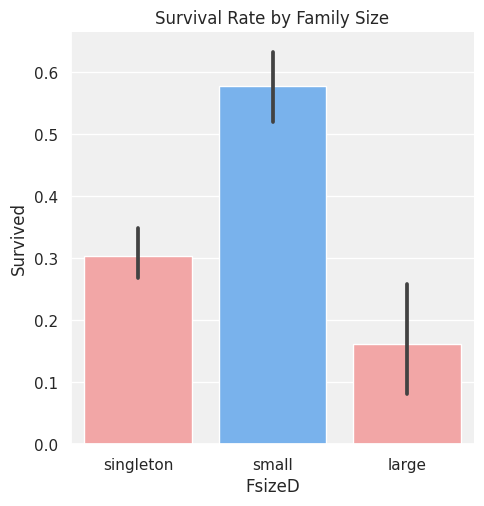

In [ ]:
custom_palette = ["#FF9999", "#66B2FF"]
background_color = "#F0F0F0"
plt.rcParams['axes.facecolor'] = background_color
g = sea.catplot(x="FsizeD", y="Survived", data=titanicdata, kind="bar", palette=custom_palette)
plt.title('Survival Rate by Family Size')
plt.show()

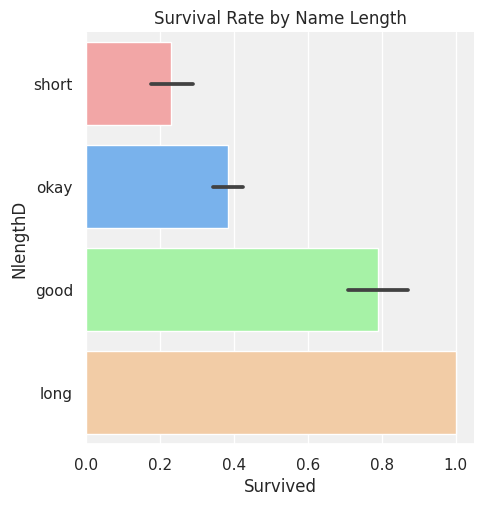

In [ ]:
titanicdata["NameLength"] = titanicdata["Name"].apply(lambda x: len(x))
titanic_test["NameLength"] = titanic_test["Name"].apply(lambda x: len(x))
bins = [0, 20, 40, 57, 85]
group_names = ['short', 'okay', 'good', 'long']
titanicdata['NlengthD'] = pd.cut(titanicdata['NameLength'], bins, labels=group_names)
titanic_test['NlengthD'] = pd.cut(titanic_test['NameLength'], bins, labels=group_names)
custom_palette = ["#FF9999", "#66B2FF", "#99FF99", "#FFCC99"]

sea.catplot(x="Survived", y="NlengthD", data=titanicdata, kind="bar", palette=custom_palette)
plt.title('Survival Rate by Name Length')
plt.show()

In [ ]:
import re

def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""

titles = titanicdata["Name"].apply(get_title)
print(pd.value_counts(titles))

titanicdata["Title"] = titles

rare_title = ['Dona', 'Lady', 'Countess','Capt', 'Col', 'Don',
                'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer']


titanicdata.loc[titanicdata["Title"] == "Mlle", "Title"] = 'Miss'
titanicdata.loc[titanicdata["Title"] == "Ms", "Title"] = 'Miss'
titanicdata.loc[titanicdata["Title"] == "Mme", "Title"] = 'Mrs'
titanicdata.loc[titanicdata["Title"] == "Dona", "Title"] = 'Rare Title'
titanicdata.loc[titanicdata["Title"] == "Lady", "Title"] = 'Rare Title'
titanicdata.loc[titanicdata["Title"] == "Countess", "Title"] = 'Rare Title'
titanicdata.loc[titanicdata["Title"] == "Capt", "Title"] = 'Rare Title'
titanicdata.loc[titanicdata["Title"] == "Col", "Title"] = 'Rare Title'
titanicdata.loc[titanicdata["Title"] == "Don", "Title"] = 'Rare Title'
titanicdata.loc[titanicdata["Title"] == "Major", "Title"] = 'Rare Title'
titanicdata.loc[titanicdata["Title"] == "Rev", "Title"] = 'Rare Title'
titanicdata.loc[titanicdata["Title"] == "Sir", "Title"] = 'Rare Title'
titanicdata.loc[titanicdata["Title"] == "Jonkheer", "Title"] = 'Rare Title'
titanicdata.loc[titanicdata["Title"] == "Dr", "Title"] = 'Rare Title'

titanicdata["Title"].value_counts()


titles = titanic_test["Name"].apply(get_title)
print(pd.value_counts(titles))

titanic_test["Title"] = titles

rare_title = ['Dona', 'Lady', 'Countess','Capt', 'Col', 'Don',
                'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer']

titanic_test.loc[titanic_test["Title"] == "Mlle", "Title"] = 'Miss'
titanic_test.loc[titanic_test["Title"] == "Ms", "Title"] = 'Miss'
titanic_test.loc[titanic_test["Title"] == "Mme", "Title"] = 'Mrs'
titanic_test.loc[titanic_test["Title"] == "Dona", "Title"] = 'Rare Title'
titanic_test.loc[titanic_test["Title"] == "Lady", "Title"] = 'Rare Title'
titanic_test.loc[titanic_test["Title"] == "Countess", "Title"] = 'Rare Title'
titanic_test.loc[titanic_test["Title"] == "Capt", "Title"] = 'Rare Title'
titanic_test.loc[titanic_test["Title"] == "Col", "Title"] = 'Rare Title'
titanic_test.loc[titanic_test["Title"] == "Don", "Title"] = 'Rare Title'
titanic_test.loc[titanic_test["Title"] == "Major", "Title"] = 'Rare Title'
titanic_test.loc[titanic_test["Title"] == "Rev", "Title"] = 'Rare Title'
titanic_test.loc[titanic_test["Title"] == "Sir", "Title"] = 'Rare Title'
titanic_test.loc[titanic_test["Title"] == "Jonkheer", "Title"] = 'Rare Title'
titanic_test.loc[titanic_test["Title"] == "Dr", "Title"] = 'Rare Title'

titanic_test["Title"].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Lady          1
Sir           1
Mme           1
Countess      1
Capt          1
Don           1
Ms            1
Jonkheer      1
Name: Name, dtype: int64
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Name, dtype: int64


Mr            240
Miss           79
Mrs            72
Master         21
Rare Title      6
Name: Title, dtype: int64

In [ ]:
titanicdata["Ticket"].tail()

884    SOTON/OQ 392076
885             382652
886             211536
888         W./C. 6607
890             370376
Name: Ticket, dtype: object

In [ ]:
titanicdata["TicketNumber"] = titanicdata["Ticket"].str.extract('(\d{2,})', expand=True)
titanicdata["TicketNumber"] = titanicdata["TicketNumber"].apply(pd.to_numeric)

titanic_test["TicketNumber"] = titanic_test["Ticket"].str.extract('(\d{2,})', expand=True)
titanic_test["TicketNumber"] = titanic_test["TicketNumber"].apply(pd.to_numeric)

In [ ]:
titanicdata[titanicdata["TicketNumber"].isnull()]

styled_table = titanicdata[titanicdata["TicketNumber"].isnull()].style.set_table_styles([
    {'selector': 'th', 'props': [('background-color', 'lightblue'), ('color', 'black')]},
    {'selector': 'td', 'props': [('background-color', 'yellow'), ('color', 'black')]}
])
styled_table

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,FamilySize,FsizeD,NameLength,NlengthD,Title,TicketNumber
772,773,0,2,"Mack, Mrs. (Mary)",female,57.000000,0,0,S.O./P.P. 3,10.500000,E77,S,E,1,singleton,17,short,Mrs,nan
179,180,0,3,"Leonard, Mr. Lionel",male,36.000000,0,0,LINE,0.000000,nan,S,Z,1,singleton,19,short,Mr,nan
271,272,1,3,"Tornquist, Mr. William Henry",male,25.000000,0,0,LINE,0.000000,nan,S,Z,1,singleton,28,okay,Mr,nan
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.000000,0,0,LINE,0.000000,nan,S,Z,1,singleton,31,okay,Mr,nan
597,598,0,3,"Johnson, Mr. Alfred",male,49.000000,0,0,LINE,0.000000,nan,S,Z,1,singleton,19,short,Mr,nan
841,842,0,2,"Mudd, Mr. Thomas Charles",male,16.000000,0,0,S.O./P.P. 3,10.500000,nan,S,Z,1,singleton,24,okay,Mr,nan


In [ ]:
titanicdata.TicketNumber.fillna(titanicdata["TicketNumber"].median(), inplace=True)
titanic_test.TicketNumber.fillna(titanic_test["TicketNumber"].median(), inplace=True)

Encoding the Data

In [ ]:
labelEnc=LabelEncoder()

cat_vars=['Embarked','Sex',"Title","FsizeD","NlengthD",'Deck']
for col in cat_vars:
    titanicdata[col]=labelEnc.fit_transform(titanicdata[col])
    titanic_test[col]=labelEnc.fit_transform(titanic_test[col])

titanicdata.head()

styled_table = titanicdata.head().style.set_table_styles([
    {'selector': 'th', 'props': [('background-color', 'pink'), ('color', 'black')]},
    {'selector': 'td', 'props': [('background-color', 'violet'), ('color', 'black')]}
])
styled_table

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,FamilySize,FsizeD,NameLength,NlengthD,Title,TicketNumber
475,476,0,1,"Clifford, Mr. George Quincy",1,nan,0,0,110465,52.000000,A14,2,0,1,1,27,2,2,110465.000000
174,175,0,1,"Smith, Mr. James Clinch",1,56.000000,0,0,17764,30.695800,A7,0,0,1,1,23,2,2,17764.000000
209,210,1,1,"Blank, Mr. Henry",1,40.000000,0,0,112277,31.000000,A31,0,0,1,1,16,3,2,112277.000000
445,446,1,1,"Dodge, Master. Washington",1,4.000000,0,2,33638,81.858300,A34,2,0,3,2,25,2,0,33638.000000
647,648,1,1,"Simonius-Blumer, Col. Oberst Alfons",1,56.000000,0,0,13213,35.500000,A26,0,0,1,1,35,2,4,13213.000000


Age Column prediction of null values

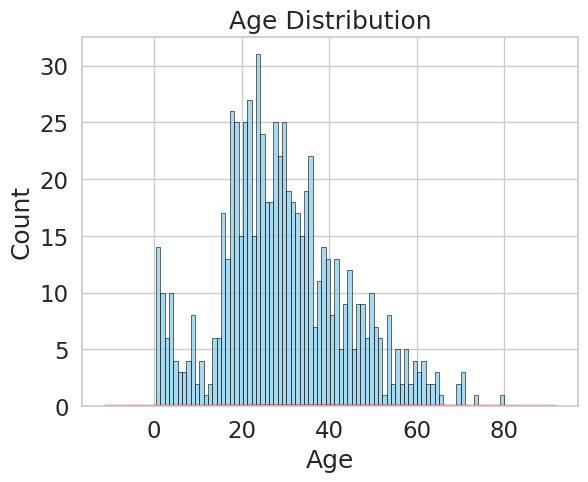

In [ ]:
import seaborn as sea
import matplotlib.pyplot as plt

with sea.plotting_context("notebook", font_scale=1.5):
    sea.set_style("whitegrid")
    sea.histplot(titanicdata["Age"].dropna(), bins=80, kde=False, color="skyblue", edgecolor="black")
    sea.kdeplot(titanicdata["Age"].dropna(), color="red", linewidth=2)

    plt.title("Age Distribution")
    plt.xlabel("Age")
    plt.ylabel("Count")
    plt.show()

Splitting into training and testing data

In [ ]:
from sklearn.ensemble import RandomForestRegressor
def fill_missing_age(df):

    age_df = df[['Age','Embarked','Fare', 'Parch', 'SibSp',
                 'TicketNumber', 'Title','Pclass','FamilySize',
                 'FsizeD','NameLength',"NlengthD",'Deck']]

    train  = age_df.loc[ (df.Age.notnull()) ]
    test = age_df.loc[ (df.Age.isnull()) ]

    y = train.values[:, 0]
    X = train.values[:, 1::]

    rt = RandomForestRegressor(n_estimators=2000, n_jobs=-1)
    rt.fit(X, y)

    predictedAges = rt.predict(test.values[:, 1::])

    df.loc[ (df.Age.isnull()), 'Age' ] = predictedAges

    return df

In [ ]:
titanicdata=fill_missing_age(titanicdata)
titanic_test=fill_missing_age(titanic_test)

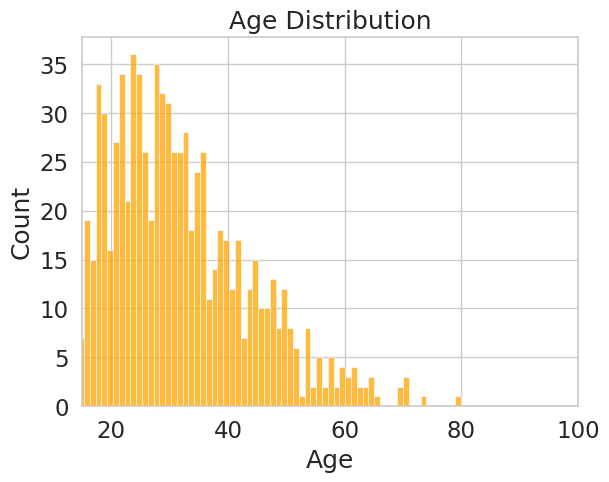

In [ ]:
with sea.plotting_context("notebook", font_scale=1.5):
    sea.set_style("whitegrid")

    sea.histplot(titanicdata["Age"].dropna(), bins=80, kde=False, color="orange")

    plt.title("Age Distribution")
    plt.xlabel("Age")
    plt.ylabel("Count")

    plt.xlim((15, 100))
    plt.show()

scaling wrt features

In [ ]:
std_scale = preprocessing.StandardScaler().fit(titanicdata[['Age', 'Fare']])
titanicdata[['Age', 'Fare']] = std_scale.transform(titanicdata[['Age', 'Fare']])


std_scale = preprocessing.StandardScaler().fit(titanic_test[['Age', 'Fare']])
titanic_test[['Age', 'Fare']] = std_scale.transform(titanic_test[['Age', 'Fare']])

Correlation of features with target

<ipython-input-55-ac603ea9e54c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = titanicdata.corr()


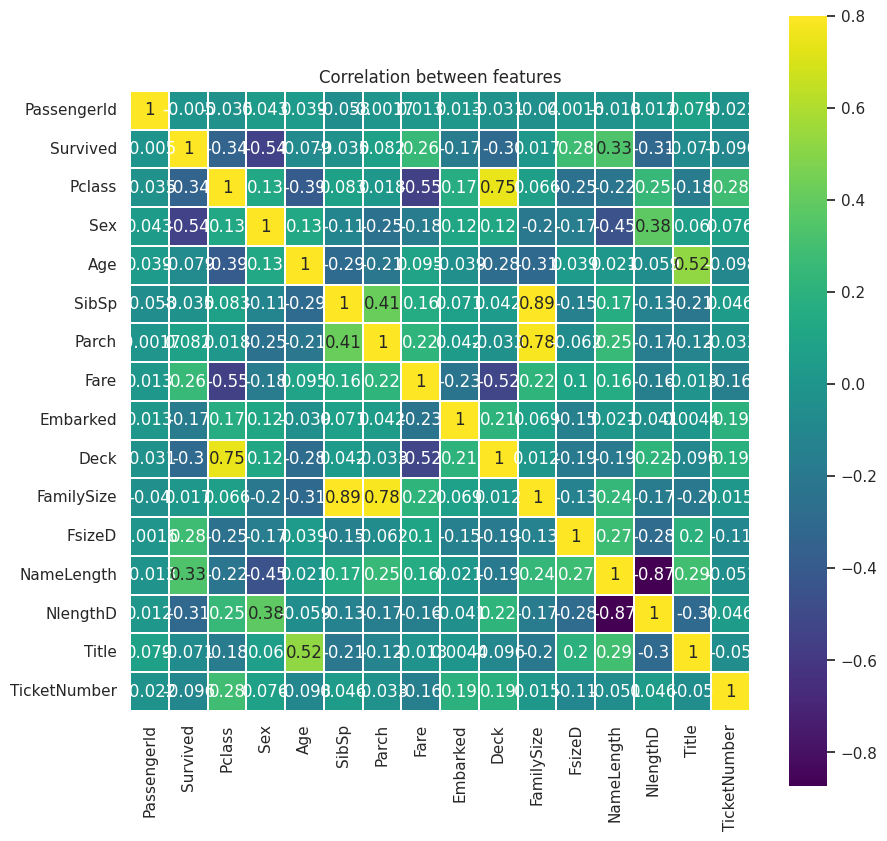

In [ ]:
corr = titanicdata.corr()
plt.figure(figsize=(10, 10))
sea.heatmap(corr, vmax=.8, linewidths=0.01, square=True, annot=True, cmap='viridis', linecolor="white")
plt.title('Correlation between features')
plt.show()

In [ ]:
titanicdata.corr()["Survived"]

<ipython-input-56-ba86593d14ba>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  titanicdata.corr()["Survived"]


PassengerId    -0.005007
Survived        1.000000
Pclass         -0.338481
Sex            -0.543351
Age            -0.079178
SibSp          -0.035322
Parch           0.081629
Fare            0.257307
Embarked       -0.174199
Deck           -0.301116
FamilySize      0.016639
FsizeD          0.283810
NameLength      0.332350
NlengthD       -0.312234
Title          -0.071174
TicketNumber   -0.096161
Name: Survived, dtype: float64

**PREDICTION OF SURVIVAL**

Using Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, ShuffleSplit

predictors = ["Pclass", "Sex", "Fare", "Embarked", "Deck", "Age", "FsizeD", "NlengthD", "Title", "Parch"]

lr = LogisticRegression(random_state=1)

cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=50)

scores = cross_val_score(lr, titanicdata[predictors], titanicdata["Survived"], scoring='f1', cv=cv)

print(scores.mean())


0.7450401762716468


Essential Features Predictions

Using Random Forest algorithm
Essential Features prediction

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_predict, ShuffleSplit, cross_val_score
import numpy as np
import pandas as pd

predictors = ["Pclass", "Sex", "Age", "Fare", "NlengthD", "NameLength", "FsizeD", "Title", "Deck"]

rf = RandomForestClassifier(random_state=1, n_estimators=10, min_samples_split=2, min_samples_leaf=1)

kf = KFold(n_splits=5, shuffle=True, random_state=1)
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=50)

predictions = cross_val_predict(rf, titanicdata[predictors], titanicdata["Survived"], cv=kf)
predictions = pd.Series(predictions)

scores = cross_val_score(rf, titanicdata[predictors], titanicdata["Survived"], scoring='f1', cv=kf)

print(scores.mean())


0.7413230613452748


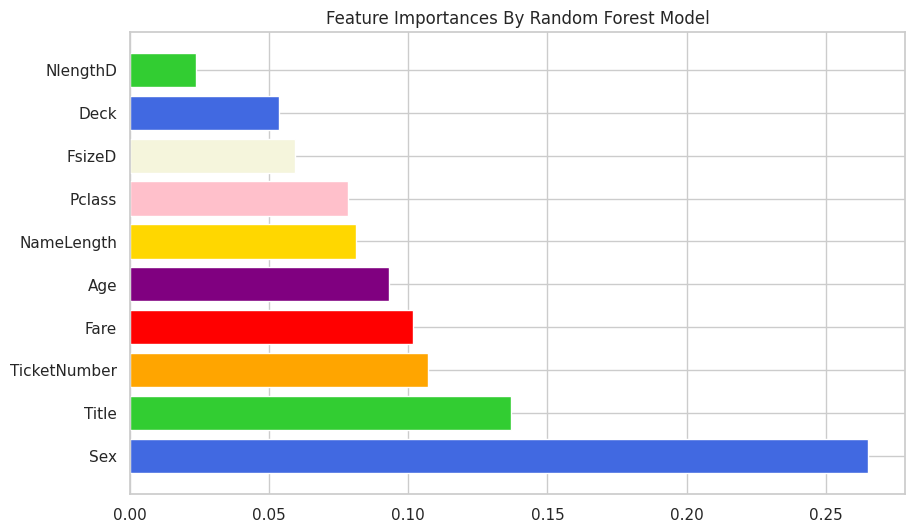

In [ ]:
importances = rf.feature_importances_
std = np.std([rf.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
sorted_important_features = [predictors[i] for i in indices]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances By Random Forest Model")


colors = ['royalblue', 'limegreen', 'orange', 'red', 'purple', 'gold', 'pink', 'beige']

plt.barh(range(len(sorted_important_features)), importances[indices], color=colors)
plt.yticks(range(len(sorted_important_features)), sorted_important_features)

plt.show()

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
predictors = ["Pclass", "Sex", "Age", "Fare", "Embarked","NlengthD",
              "FsizeD", "Title","Deck","TicketNumber"]
adb=AdaBoostClassifier()
adb.fit(titanicdata[predictors],titanicdata["Survived"])
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=50)
scores = cross_val_score(adb, titanicdata[predictors], titanicdata["Survived"], scoring='f1',cv=cv)
print(scores.mean())

0.7585681139438613


In [ ]:
predictions=["Pclass", "Sex", "Age", "Fare", "Embarked","NlengthD",
              "FsizeD", "Title","Deck","NameLength","TicketNumber"]
from sklearn.ensemble import VotingClassifier
eclf1 = VotingClassifier(estimators=[
        ('lr', lr), ('rf', rf), ('adb', adb)], voting='soft')
eclf1 = eclf1.fit(titanicdata[predictors], titanicdata["Survived"])
predictions=eclf1.predict(titanicdata[predictors])
predictions

test_predictions=eclf1.predict(titanic_test[predictors])

test_predictions=test_predictions.astype(int)
submission = pd.DataFrame({
        "PassengerId": titanic_test["PassengerId"],
        "Survived": test_predictions
    })

submission.to_csv("titanic_submission.csv", index=False)

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_indices, test_indices in split.split(titanicdata, titanicdata[["Survived","Pclass", "Sex"]]):
  strat_train_set = titanicdata.loc[train_indices]
  strat_test_set = titanicdata.loc[test_indices]

In [ ]:
strat_test_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,FamilySize,FsizeD,NameLength,NlengthD,Title,TicketNumber
174,175,0,1,"Smith, Mr. James Clinch",1,1.909196,0,0,17764,-0.030371,A7,0,0,1,1,23,2,2,17764.0
349,350,0,3,"Dimic, Mr. Jovan",1,0.891820,0,0,315088,-0.474005,NaN,2,8,1,1,16,3,2,315088.0
454,455,0,3,"Peduzzi, Mr. Joseph",1,-0.035354,0,0,A/5 2817,-0.486337,NaN,2,8,1,1,19,3,2,2817.0
656,657,0,3,"Radeff, Mr. Alexander",1,-0.304686,0,0,349223,-0.489442,NaN,2,8,1,1,21,2,2,349223.0
90,91,0,3,"Christmann, Mr. Emil",1,-0.052885,0,0,343276,-0.486337,NaN,2,8,1,1,20,3,2,343276.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,501,0,3,"Calic, Mr. Petar",1,-0.924922,0,0,315086,-0.474005,NaN,2,8,1,1,16,3,2,315086.0
121,122,0,3,"Moore, Mr. Leonard Charles",1,-0.560356,0,0,A4. 54510,-0.486337,NaN,2,8,1,1,26,2,2,54510.0
596,597,1,2,"Leitch, Miss. Jessie Wills",0,0.209652,0,0,248727,0.016023,NaN,2,8,1,1,26,2,1,248727.0
595,596,0,3,"Van Impe, Mr. Jean Baptiste",1,0.455802,1,1,345773,-0.162169,NaN,2,8,3,2,27,2,2,345773.0


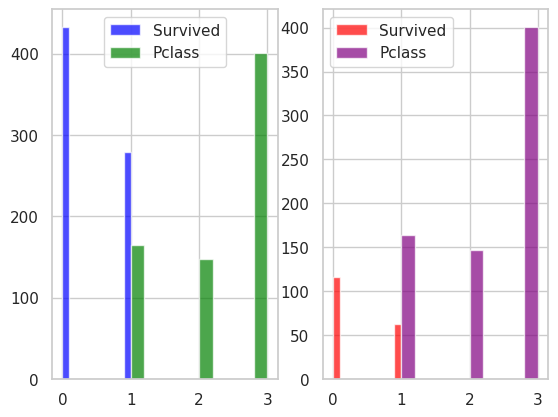

In [ ]:
plt.subplot(1, 2, 1)
strat_train_set['Survived'].hist(color='blue', alpha=0.7, label='Survived')
strat_train_set['Pclass'].hist(color='green', alpha=0.7, label='Pclass')
plt.legend()

plt.subplot(1, 2, 2)
strat_test_set['Survived'].hist(color='red', alpha=0.7, label='Survived')
strat_train_set['Pclass'].hist(color='purple', alpha=0.7, label='Pclass')
plt.legend()

plt.show()

In [ ]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 858 to 848
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   712 non-null    int64  
 1   Survived      712 non-null    int64  
 2   Pclass        712 non-null    int64  
 3   Name          712 non-null    object 
 4   Sex           712 non-null    int64  
 5   Age           712 non-null    float64
 6   SibSp         712 non-null    int64  
 7   Parch         712 non-null    int64  
 8   Ticket        712 non-null    object 
 9   Fare          712 non-null    float64
 10  Cabin         153 non-null    object 
 11  Embarked      712 non-null    int64  
 12  Deck          712 non-null    int64  
 13  FamilySize    712 non-null    int64  
 14  FsizeD        712 non-null    int64  
 15  NameLength    712 non-null    int64  
 16  NlengthD      712 non-null    int64  
 17  Title         712 non-null    int64  
 18  TicketNumber  712 non-null  